In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [76]:
df= pd.read_excel('Data.xlsx')
df.head()
df['FECHA'] =pd.to_datetime(df['FECHA'])
df.describe()

,FECHA,SKU,CAT,SUBCAT,REM,GRU_GRUPO,VEN,CAN,DIA
count,11436,11436.000000,11436.000000,11436.000000,1.143600e+04,11436.000000,11436.000000,11436.000000,11436.000000
mean,2023-08-31 06:11:27.513116416,724.370759,2.051591,16.771249,3.475430e+06,8.734960,0.121271,0.002301,16.397692
min,2023-08-01 00:00:00,2.000000,1.000000,2.000000,3.449596e+06,1.000000,0.008646,0.000000,1.000000
25%,2023-08-14 00:00:00,166.000000,1.000000,2.000000,3.461928e+06,5.000000,0.064674,0.000000,9.000000
50%,2023-08-30 00:00:00,481.000000,3.000000,12.000000,3.474408e+06,5.000000,0.098985,0.000000,16.000000
75%,2023-09-17 00:00:00,1107.000000,3.000000,29.000000,3.489148e+06,15.000000,0.155845,0.000000,24.000000
max,2023-09-30 00:00:00,2815.000000,4.000000,82.000000,3.501354e+06,16.000000,1.000000,0.473684,31.000000
std,NaN,719.113138,1.005519,13.686213,1.540858e+04,5.666752,0.083222,0.012217,9.018987


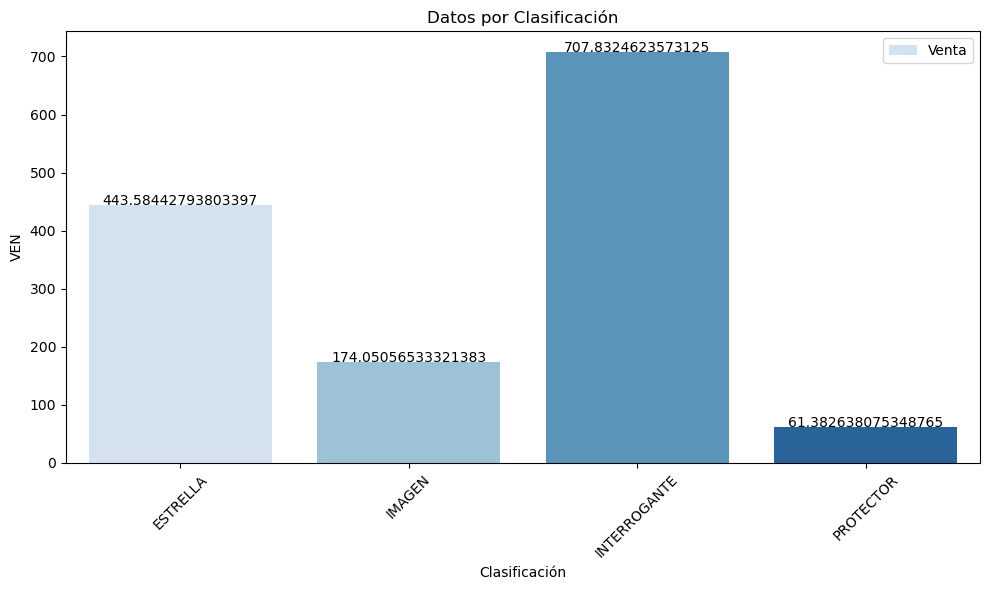

In [62]:
def graficar_can_refs(df,mes):
    df = df[df['MES']==mes]
    df = df[['CLASIFICACION','SKU']].drop_duplicates()
    result = df.groupby('CLASIFICACION')['SKU'].count()
    return result

refs = graficar_can_refs(df,'2023-09')

result = df.groupby('CLASIFICACION')[['VEN', 'CAN']].sum()
result['REFS'] = refs
result = result.reset_index()

# Crea un gráfico de barras apiladas para la suma de VEN y CAN
def graficar(column):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=result, x='CLASIFICACION', y=column, palette="Blues", label="Venta")
    plt.title('Datos por Clasificación')
    plt.xlabel('Clasificación')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    for i in np.arange(0,result['CLASIFICACION'].unique().shape[0],1):
        plt.text(x=i,y=result[column].iloc[i],s=result[column].iloc[i],ha='center')
    plt.show()
graficar('VEN')

Al analizar la venta por clasificación de productos, notamos que los productos catalogados como "Interrogantes" presentan la mayor cantidad acumulada de ventas, seguidos por los productos clasificados como "Estrellas". Este enfoque de análisis puede ser valioso para evaluar la relevancia de todos los productos dentro de cada cuadrante, sin importar su categoría. Sin embargo, es importante señalar que se requieren análisis adicionales para validar esta hipótesis.

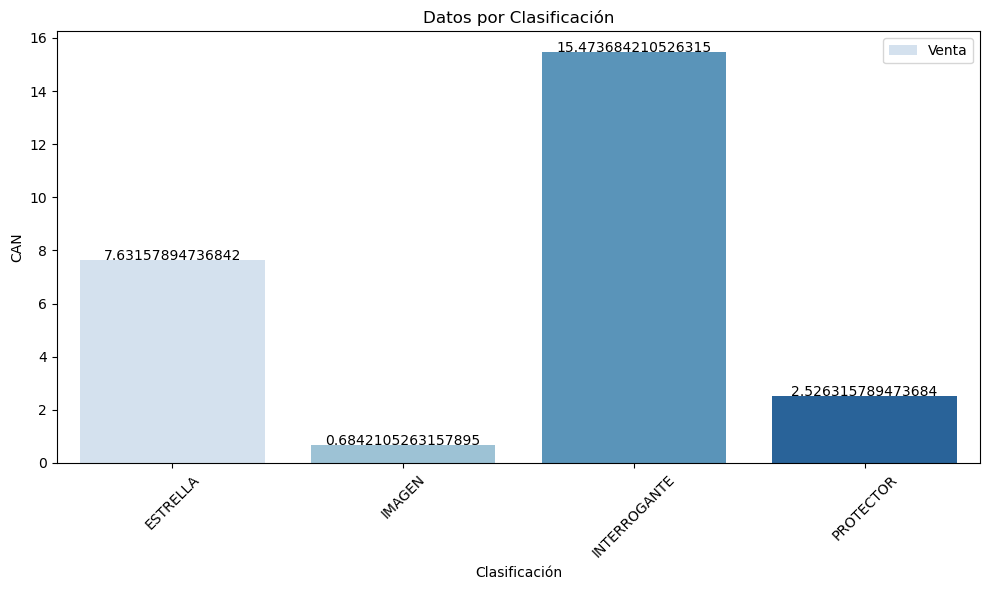

In [63]:
graficar('CAN')

Realizando el análisis por cantidades encontramos que nuevamente en interrogante se encuentra la mayoría de unidades vendidas de forma acumulada, sin embargo en la matriz los productos que más rotan son los Estrella y los Protectores, lo cual en este caso podemos ver que los protectores están por encima en valor absoluto de los producto “imagen” y deberemos hacer un análisis de rotación promedio por producto para entender el por que de estas diferencias en cuanto a valor absoluto.

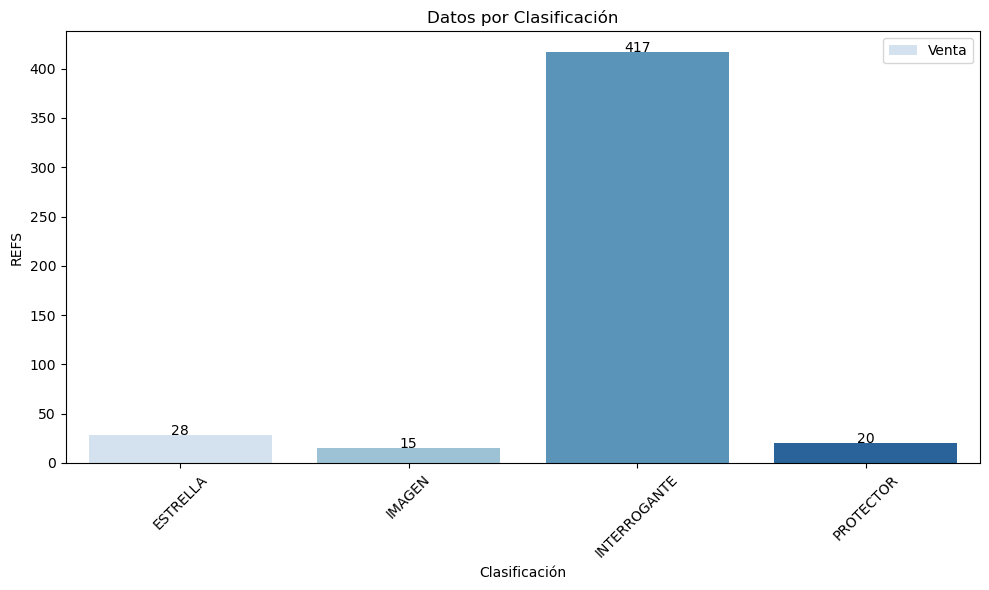

In [64]:
graficar('REFS')

Para entender como porque interrogante tiene un peso tan grande en valores absolutos debemos analizar el tamaño del portafolio:
Como podemos observar en la siguiente gráfica, existe una gran cantidad de referencias que son interrogantes, y muy pocas están en los otros cuadrantes, el 87% de las referencias son interrogante.


In [61]:
result['PART_PORTAFOLIO'] = result['REFS']/result['REFS'].sum()
result

,CLASIFICACION,VEN,CAN,REFS,PART_PORTAFOLIO
0,ESTRELLA,443.584428,7.631579,28,0.058333
1,IMAGEN,174.050565,0.684211,15,0.031250
2,INTERROGANTE,707.832462,15.473684,417,0.868750
3,PROTECTOR,61.382638,2.526316,20,0.041667


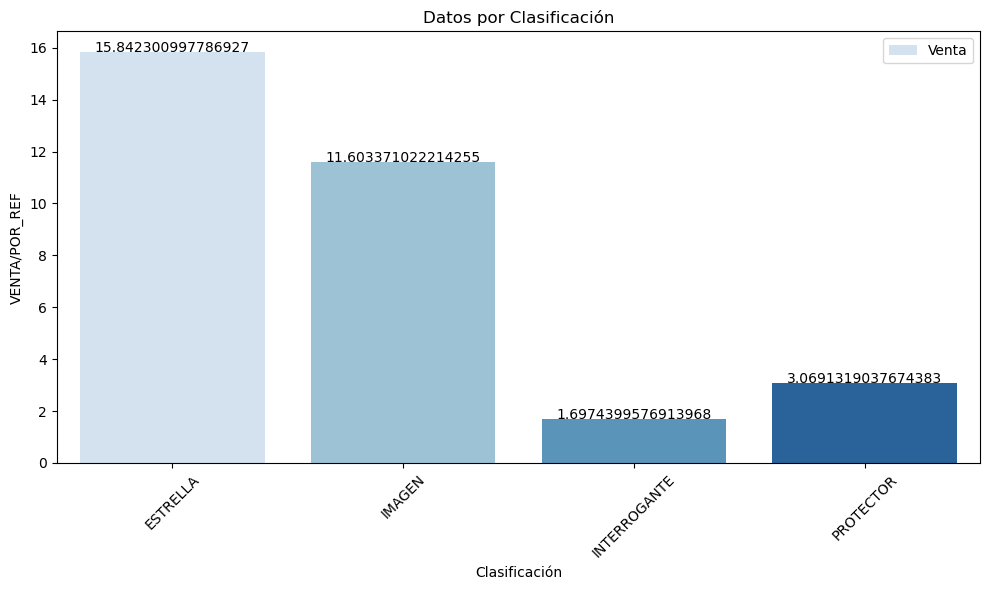

In [69]:
result['VENTA/POR_REF'] = result['VEN']/result['REFS']
result['CANTIDAD/POR_REF'] = result['CAN']/result['REFS']
graficar('VENTA/POR_REF')

Analizando la venta promedio por referencias encontramos que cada referencia estrella vende 15.842 en promedio, seguido de los productos imagen que venden 11.60, las estrellas venden 8.3 veces más que un producto interrogante, es por esto que la administración de estas referencias es tan importante

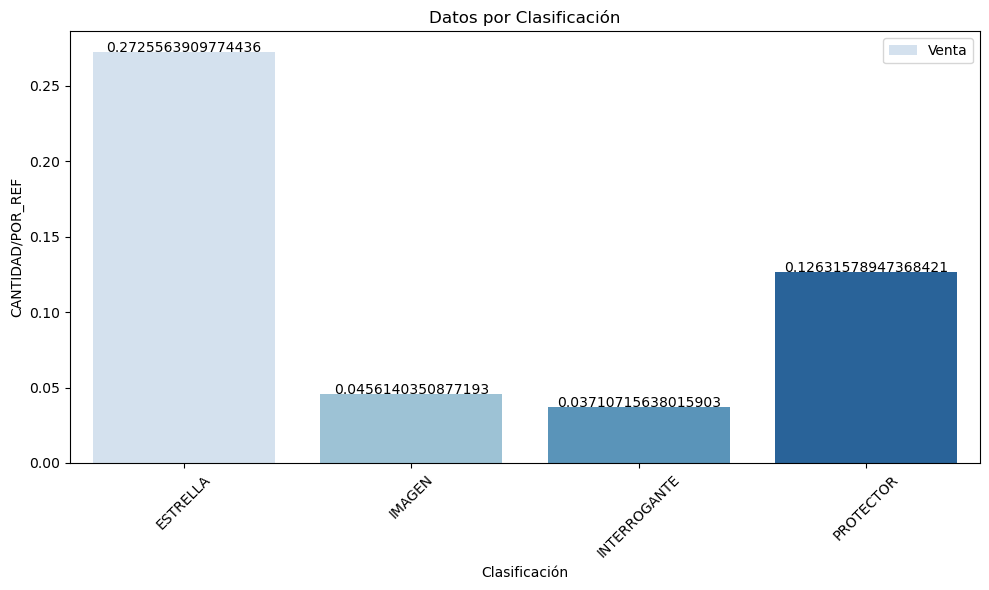

In [72]:
graficar('CANTIDAD/POR_REF')

Y si analizamos la cantidad de unidades vendidas por referencias encontramos un análisis similar, las referencias que más rotan son los productos estrellas seguido de los protectores.

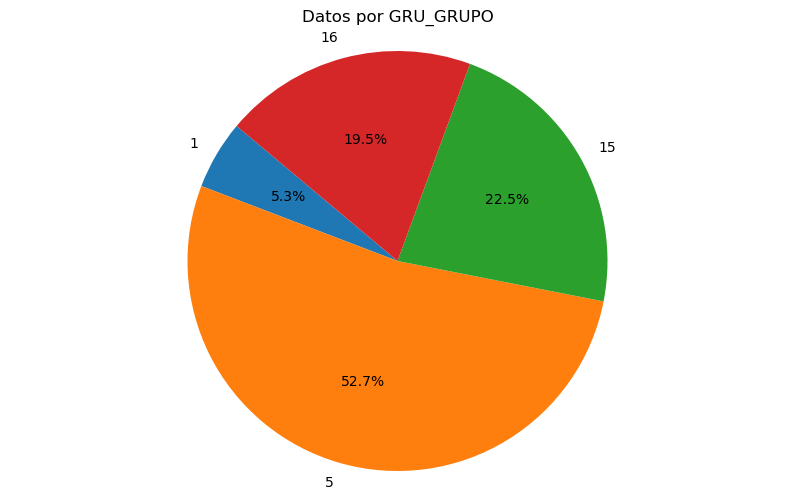

In [84]:

result_cat = df.groupby('GRU_GRUPO')[['VEN', 'CAN']].sum()
result_cat = result_cat.reset_index()

def graficar(column):
    plt.figure(figsize=(10, 6))
    
    # Crear un gráfico de torta
    plt.pie(result_cat[column], labels=result_cat['GRU_GRUPO'], autopct='%1.1f%%', startangle=140)
    plt.title('Datos por GRU_GRUPO')
    
    plt.axis('equal')  # Proporciona un círculo perfecto
    
    plt.show()

graficar('VEN')


Otros análisis que podemos hacer es ventas por grupo de categorías, a continuación podemos observar que existe un grupo de categoría con una mayor participación el cual es el grupo 5, cuenta con más de un 50% de la participación total, mientras que el grupo 1 representa cerca del 5% de la part.

In [94]:
df.groupby(['SKU','GRU_GRUPO','CLASIFICACION'])['VEN'].sum()\
    .reset_index().sort_values(by='VEN',ascending=False).head(10)

,SKU,GRU_GRUPO,CLASIFICACION,VEN
1,4,5,ESTRELLA,96.760584
6,28,5,ESTRELLA,32.662707
63,260,16,ESTRELLA,31.776621
78,336,5,ESTRELLA,27.469571
31,136,16,ESTRELLA,27.317479
162,681,5,IMAGEN,20.128930
113,504,5,ESTRELLA,19.003499
100,424,5,ESTRELLA,18.465339
101,431,5,IMAGEN,17.540639
7,29,16,IMAGEN,16.940996
